In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
%store -r data_frame

In [3]:
'''
Recreating the RT graph from the JOI vs JOR paper by Mark Howard

Takes in a specifiede pandas dataframe with the correct fields from
the JOR v1.0 or v1.1 experiment and outputs a rt graph in the manner
of the JOI vs JOR paper.
'''
def recreate_rt_graph(df):
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    #distances = [0, 2, 4, 16, 68, 'many']
    distances = ['many', 68, 16, 4, 2, 0]

    '''
    '''
    def average_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        return corr["rt"].mean()
    
    
    '''
    '''
    def ste_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        # print(corr['rt'].sem()) #Coulda, shoulda, woulda
        return corr["rt"].std() / math.sqrt(len(corr))
    

    '''
    '''
    def graph_for_distance(more_recent_item, comparisons, distances, df):
        y = []
        x = []
        yerr = []
        for i in range(len(distances)):
            if i < more_recent_item:
                x.append(distances[i])
                y.append(average_for_comp(df, [distances[more_recent_item], distances[i]]))
                yerr.append(ste_for_comp(df, [distances[more_recent_item], distances[i]]))

        x = np.array(x)
        y = np.array(y)
        yerr = np.array(yerr)
        
        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
        colors = ['lightgray', 'silver', 'darkgrey', 'gray', 'dimgrey', 'black']
        color = colors[more_recent_item]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]

        # Graph line
        #ax.plot(x, y, clip_on = False, color = color, marker = marker, label=distances[more_recent_item])
        #ax.fill_between(x, y-yerr, y+yerr, alpha=0.7, edgecolor=color, facecolor=color)
        ax.errorbar(x, y, yerr=yerr, clip_on = False, color = color, marker = marker, label=distances[more_recent_item])

    fig, ax = plt.subplots()
    plt.title('Response Time In Cross Category Judgements')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Lag to the less recent probe')
    ax.yaxis.set_ticks_position('both')

    for i in range(len(distances)):
        if not distances[i] == 'many':
            graph_for_distance(i, comparisons, distances, df)

    lgd = plt.legend(title = 'Lag to the more\n  recent probe', fancybox=True, bbox_to_anchor=(1.32, 1))
    plt.savefig('joir_rt_mimic.pdf', format='pdf', dpi=1200, bbox_extra_artists=[lgd], bbox_inches='tight')
    plt.show()

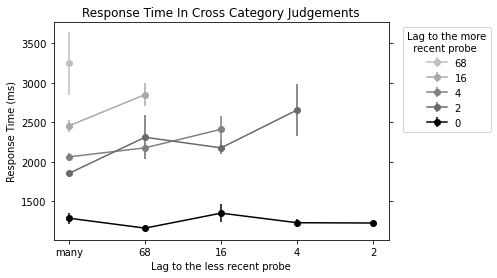

In [4]:
recreate_rt_graph(data_frame)

In [5]:
def graph_original():
    
    # Retrieve data taken from original graph
    df = pd.read_csv('JOIR_responsetime.csv')
    
    # Create the graph
    fig, ax = plt.subplots()
    plt.title('Response Time In Cross Category Judgements (Replication)')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Lag to the less recent probe')
    ax.yaxis.set_ticks_position('both')

    # Graph the data
    more_recent_lags = [-6, -5, -4, -3, -2, -1]
    for i in range(len(more_recent_lags)):
        curr = df[df['more_recent_lag'] == more_recent_lags[i]]
        
        x = curr['less_recent_lag'].tolist()
        y = curr['response_time(ms)'].tolist()
        yerr = curr['error(ms)'].tolist()
        
        colors = ['lightgray', 'silver', 'darkgrey', 'gray', 'dimgrey', 'black']
        color = colors[i]
        marker = 'o'
        ax.errorbar(x, y, yerr=yerr, clip_on = False, color = color, marker = marker)
    
    #Show the data
    lgd = plt.legend(more_recent_lags, title = 'Lag to the more\n  recent probe', fancybox=True, bbox_to_anchor=(1.32, 1))
    plt.savefig('joir_rt_replication.pdf', format='pdf', dpi=1200, bbox_extra_artists=[lgd], bbox_inches='tight')
    plt.show()

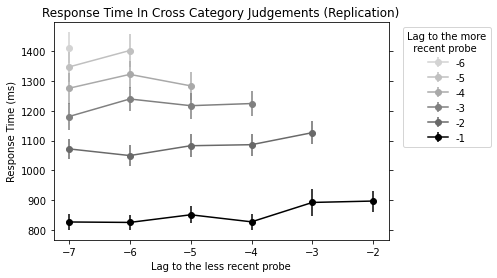

In [6]:
graph_original()